# Homework 10

## Due Nov 9th, 2020

## Fill in your name

In [279]:
first_name = "Scott"
last_name = "Urista"

assert(len(first_name) != 0)
assert(len(last_name)  != 0)
print(first_name, last_name)

Scott Urista


# Problem 1: Word Lengths
We are interested in the distribution of word lengths in English words.

Write a function wordLengths() that takes a path to a list of words
and returns a list with tuples holding the number of words of each word length.

Sort your list by length of word.  

#### Here are my partial results: words.txt holds 85 words of length 2, 908 words of length 3, and 3 words of length 21.   

```python
[(2, 85), (3, 908), ... (21, 3)]
```

In [280]:
def wordLengths(filepath):
    """returns list of tuples with number of words of each word length"""
    
    sol = {}
    
    try:
        with open(filepath, 'r') as f:
            raw_list = [word.strip() for word in f]

    except FileNotFoundError:
        print("Houston, we have a problem, could not find file {filepath}")

    for word in raw_list:
        if len(word) not in sol:
            sol[len(word)] = 1
        else:
            sol[len(word)] += 1

    return sorted(sol.items())


## Test cases for wordLengths

In [281]:
## Change this XXXX
filepath = 'words.txt'

def test_wordLengths(filepath):
    lst = wordLengths(filepath)
    print(lst)
    
    print(lst[4])
    print(lst[5])
    print(lst[6])
    print(lst[7])
    print(lst[8])
    assert lst[0] == (2, 85)
    assert lst[1] == (3, 908)
    assert lst[5] == (7, 21727)
    assert lst[-1] == (21, 3)
    
    print('\nSuccess!')

    
test_wordLengths(filepath)

[(2, 85), (3, 908), (4, 3686), (5, 8258), (6, 14374), (7, 21727), (8, 26447), (9, 16658), (10, 9199), (11, 5296), (12, 3166), (13, 1960), (14, 1023), (15, 557), (16, 261), (17, 132), (18, 48), (19, 16), (20, 5), (21, 3)]
(6, 14374)
(7, 21727)
(8, 26447)
(9, 16658)
(10, 9199)

Success!


# Problem 2: Draw a histogram of the word lengths

Use matplotlib to draw a histogram of the word lengths.  You may want to peek at the documentation

https://matplotlib.org/3.1.1/gallery/statistics/hist.html

or at this tutorial

https://datatofish.com/plot-histogram-python/

Does the histogram lineup with your results from problem 1?

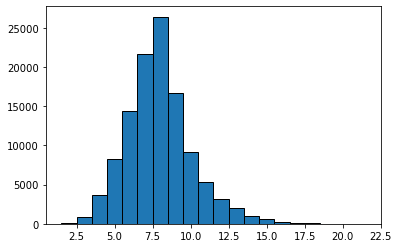

In [282]:
import matplotlib.pyplot as plt

# bar chart showing frequency per word length

def plot_histogram(filepath):
    "create a bar chart - not histogram - of wordLengths"
    x,y = zip(*wordLengths(filepath))    
    plt.bar(x,y)
    plt.show()

    

def plot_histogram_new(filepath):
    "create a bar chart that looks like a histogram"
    x,y = zip(*wordLengths(filepath))    
    plt.bar(x,y, width=1, edgecolor='black')
    plt.show()


    
# This shows a bar chart masquerading as a histogram    
plot_histogram_new('words.txt')

### Unit test of Plot Histogram

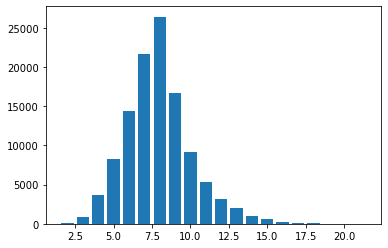

In [283]:
## Change this path to point at your copy of words.txt
plot_histogram('words.txt')

# Problem 3: Anagrams

Two words are anagrams if you can rearange the letters of the first to get the second.

Our old friends 'abut' and 'tuba' are anagrams, but so are 'abets' and 'beats'.  

However, 'hash' and 'sash', though they are the same length and made up of the same letters, are not anagrams.  

In [284]:
def are_anagrams(word1, word2):
    # Are the two words anagrams?

    # must be same length
    if len(word1) != len(word2):
        return False
    
    # can't be the same word
    if word1.lower() == word2.lower():
        return False

    #sort each string alphabetically and compare
    return sorted(word1.lower()) == sorted(word2.lower())

## Unit Tests

In [285]:
def test_anagrams():
    assert(are_anagrams('abets', 'beats'))
    assert(are_anagrams('hash', 'shah'))
    assert(are_anagrams('Hash', 'Shah'))
    
    assert(not are_anagrams('', ''))
    assert not are_anagrams("zombies", "pants")
    assert are_anagrams('streams', 'masters')
    assert are_anagrams('inlets', 'listen')
    
    return('Success!')

print(test_anagrams())

Success!


# Problem 4: Space Jam

### Can Beautiful soup parse an ancient artifact?  We'll see!

In [286]:
import requests
from bs4 import BeautifulSoup

## If you haven't already installed Beautiful Soup, you will need to run

```python
    pip install bs4
```

In [287]:
## Run this if you haven't installed Beautiful Soup

! pip install bs4

## 4.1 Display https://spacejam.com/
### Using the space jam URL to request the web page.  Pretty-print the entire page

In [326]:
import requests
from bs4 import BeautifulSoup

"prettify print the html of a given url"

url = "https://spacejam.com/"
html_content = requests.get(url).text
soup = BeautifulSoup(html_content, 'html.parser')
pretty_soup = soup.prettify()
print(pretty_soup) 


<html>
 <!-- Copyright 1996 Warner Bros. Online -->
 <!-- Badda Bing, Badda Boom -->
 <head>
  <title>
   Space Jam
  </title>
  <style type="text/css">
   .footer-links {
    margin: 5px;
  }
  </style>
 </head>
 <body alink="#ff4c4c" background="img/bg_stars.gif" bgcolor="#000000" link="#ff4c4c" text="#ff0000" vlink="#ff4c4c">
  <center>
   <!--**************Ads - Don't Touch!*************************************-->
   <center>
    <nobr>
     <table border="0" cellpadding="0" cellspacing="0" height="60" width="488">
      <tr>
       <td align="center">
        <!--#include virtual="html.ng/site=spacejam&type=movie&home=no&size=234&page.allowcompete=no"-->
       </td>
       <td align="center" width="20">
       </td>
       <td align="center">
        <!--#include virtual="html.ng/site=spacejam&type=movie&home=no&size=234"-->
       </td>
      </tr>
     </table>
    </nobr>
   </center>
   <!--*******************************************************************-->
   <br/>
   <ta

## 4.2 Find all links in the page. Print out the number of links, and display each one

In [329]:
links = soup.find_all("a")

print("Number of links:",len(links),"\n")
for x in links:
    print(x)


Number of links: 17 

<a href="cmp/pressbox/pressboxframes.html"><img alt="Press Box Shuttle" border="0" height="56" src="img/p-pressbox.gif" width="131"/></a>
<a href="cmp/jamcentral/jamcentralframes.html"><img alt="Jam Central" border="0" height="67" src="img/p-jamcentral.gif" width="55"/></a>
<a href="cmp/bball/bballframes.html"><img alt="Planet B-Ball" border="0" height="62" src="img/p-bball.gif" width="62"/></a>
<a href="cmp/tunes/tunesframes.html"><img alt="Lunar Tunes" border="0" height="77" src="img/p-lunartunes.gif" width="95"/></a>
<a href="cmp/lineup/lineupframes.html"><img alt="The Lineup" border="0" height="52" src="img/p-lineup.gif" width="63"/></a>
<a href="cmp/jump/jumpframes.html"><img alt="Jump Station" border="0" height="52" src="img/p-jump.gif" width="58"/></a>
<a href="cmp/junior/juniorframes.html"><img alt="Junior Jam" border="0" height="57" src="img/p-junior.gif" width="49"/></a>
<a href="https://www.wbshop.com/" target="_blank"><img alt="Warner Studio Store" bor

## 4.3 Note that there are more links than planets on the page!   Look for missing links!  

Loop through the links you already found, and look for the 'alt' attribute of each image

Display any links without an 'alt' attribute

Print the number of links with an 'alt' attribute

### *The Links have images: the images associated with the planets have 'alt' attributes describing the planet*

Here is a link with an image from the DCE site

```python
<a class="header__logo i-hes-logo" href="/" id="logo" rel="home" title="Home">
<noscript><img alt="Home" class="header__logo-image" src="https://www.extension.harvard.edu/sites/extension.harvard.edu/themes/extension/logo.png"/></noscript>
</a>top.jpg"/>
```
The link (a for anchor) above includes an img, duplicated below

```python
<img alt="Home" class="header__logo-image" src="https://www.extension.harvard.edu/sites/extension.harvard.edu/themes/extension/logo.png"/>
```

The image, logo.png, has an alt tag, to provide text describing the image.  The alt text here is 'Home'.  

### Gather all img tags, then look for the 'alt' attribute for each image.  If it doesn't have alt text, display it.  

In [330]:
link_imgs = []
for link in links:
    imgs = link('img')
    if imgs:
        link_imgs.append(imgs)
    else:
        print(link)

print("\n Number of links with an alt attribute:", len(link_imgs))


<a href="https://policies.warnerbros.com/privacy/" target="_blank">Privacy Policy</a>
<a class="optanon-toggle-display" href="#">Cookie Settings</a>
<a href="http://policies.warnerbros.com/terms/en-us/" target="_blank">Terms</a>
<a href="http://policies.warnerbros.com/terms/en-us/#accessibility" target="_blank">Accessibility</a>
<a href="https://policies.warnerbros.com/privacy/en-us/#adchoices" target="_blank">AdChoices</a>

 Number of links with an alt attribute: 12


## 4.4 Make a dictionary mapping 'alt' texts from the images to a URLs 
### If the href doesn't start with https, it is a partial url.  Append it to the base_url.

Here are a couple of links from the page:

```python
<a href="https://policies.warnerbros.com/privacy/" target="_blank">Privacy Policy</a>
<a href="cmp/behind/behindframes.html"><img alt="Behind the Jam" border="0" height="63" src="img/p-behind.gif" width="67"/></a>
```

The first link is a full URL: you can go to https://policies.warnerbros.com/privacy/ even today

The second link, 'cmp/behind/behindframes.html' is not a valid URL.  You need to append it to the base URL, 

https://spacejam.com/

This gives a full URL, https://spacejam.com/cmp/behind/behindframes.html, which is valid

## Print the URL to the Jam Central planet.  

# Post Mortem
How long did it take you to solve this problem set?

Did anything confuse you or cause difficulty?

In [312]:
# Sorry - I love this class, but I'm going to rant this week.
# I HATED this week's homework. 

# I don't mind spending time tackling tough problems. 
# I do mind very much mind the time wasted trying to figure out what we're supposed to do.

# The Space Jam problem is a bit of mess. I think it could have been far more interesting,
# challenging and informative if it was better organized and structured.